<a href="https://colab.research.google.com/github/aishwarya2552/my_new_repo/blob/main/Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
        PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique          NaN         NaN         NaN                       418     2   
to

<ipython-input-1-4f9c0088f1c6>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-1-4f9c0088f1c6>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

EDA Complete. Plots saved.


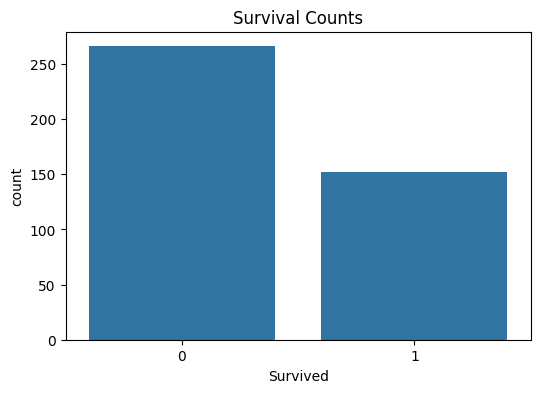

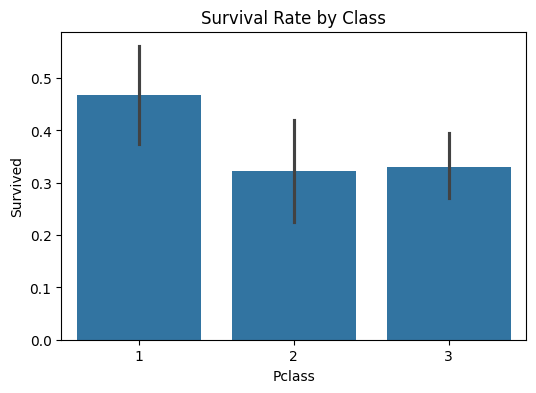

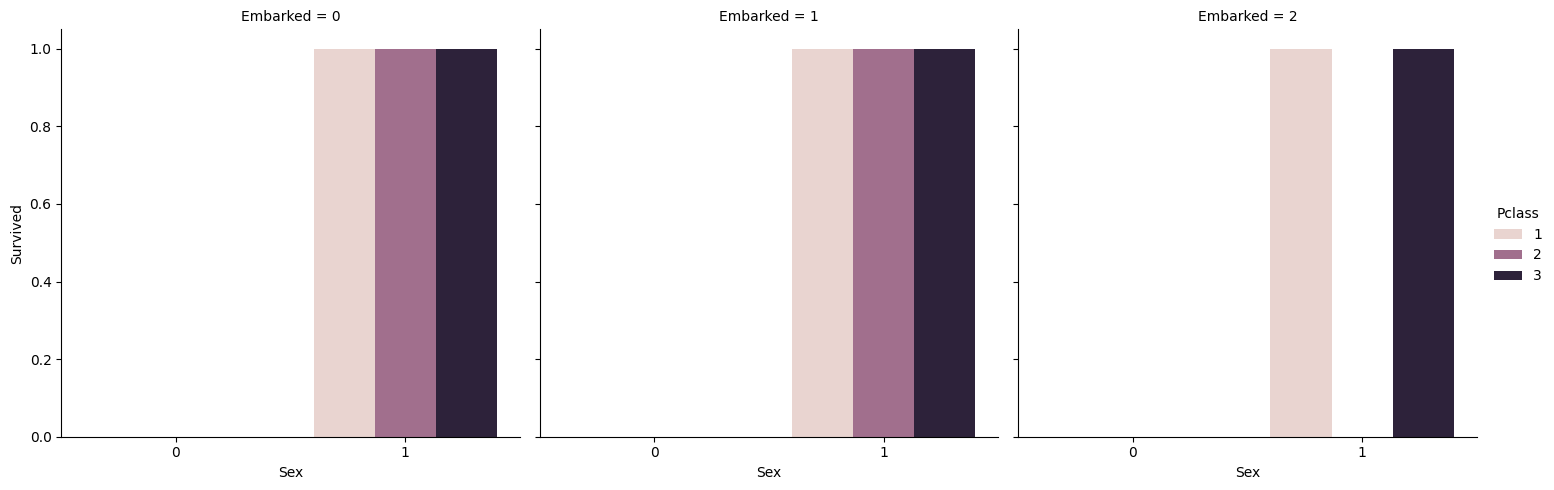

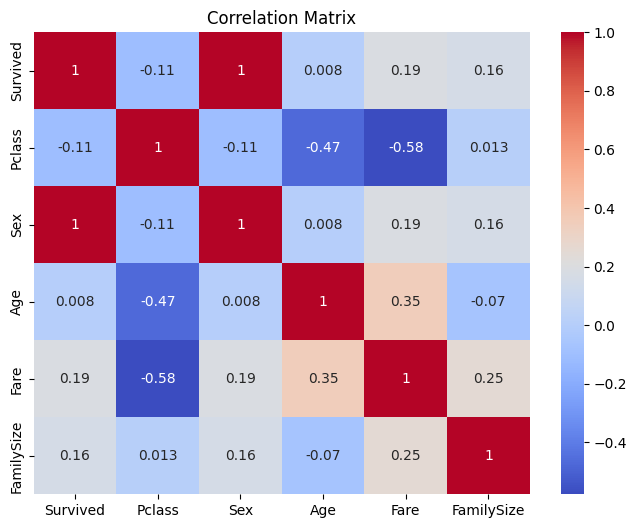

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Display basic info
print(df.info())
print(df.describe(include="all"))

# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna("S", inplace=True)

# Convert categorical to numerical
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Feature Engineering
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=False)

# Univariate Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Counts")
plt.savefig("survival_counts.png")

# Bivariate Analysis
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Class")
plt.savefig("survival_by_class.png")

# Multivariate Analysis
sns.catplot(x="Sex", y="Survived", hue="Pclass", col="Embarked", data=df, kind="bar")
plt.savefig("survival_multivariate.png")

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Survived", "Pclass", "Sex", "Age", "Fare", "FamilySize"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")

print("EDA Complete. Plots saved.")
